In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pylab
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *
%matplotlib inline
#py.sign_in('swu5656', 'zxcvbn')
#pd.options.display.mpl_style = 'default'
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter
from nltk.corpus import stopwords
from rpy2.robjects.packages import importr
from rpy2.robjects import r
import rpy2.robjects.numpy2ri as rpyn
import rpy2.robjects as robjects
from rpy2.robjects import globalenv
%load_ext rpy2.ipython


FileNotFoundError: [WinError 2] The system cannot find the file specified

In [170]:
MY_YELP_JSON_CLEAN_DATA_DIR = '/Users/shuangwu/Desktop/test/rawData'


In [171]:
business_csv_filename = os.path.join(MY_YELP_JSON_CLEAN_DATA_DIR, 'yelp_academic_dataset_business.csv')
business_DF = pd.read_csv(business_csv_filename,  sep=',', error_bad_lines=False, index_col=False, dtype='object')
#business_number_DF = business_DF.convert_objects(convert_numeric=True)
business_DF.rename(columns={'name': 'business_name', 'stars' : 'business_average_stars', 'review_count':'business_review_count'}, inplace=True)
business_DF = business_DF[['business_id', 'categories', 'business_name', 'full_address', 'city', 'state', 'type', 'latitude', 'longitude', 'attributes.Good For.latenight', 'attributes.Alcohol', 'business_review_count','attributes.Price Range','business_average_stars']]
business_DF['business_review_count'] = business_DF['business_review_count'].astype(int)
business_DF['attributes.Price Range'] = business_DF['attributes.Price Range'].astype(float)
business_DF['business_average_stars'] = business_DF['business_average_stars'].astype(float)

 

In [173]:
user_csv_filename = os.path.join(MY_YELP_JSON_CLEAN_DATA_DIR, 'yelp_academic_dataset_user.csv')
user_DF = pd.read_csv(user_csv_filename,  sep=',', error_bad_lines=False, index_col=False, dtype='object')
#user_DF = user_DF.convert_objects(convert_numeric=True)
user_DF.rename(columns={'name': 'user_name', 'review_count': 'user_review_count'}, inplace=True)
user_DF = user_DF[['user_id', 'average_stars', 'user_name', 'user_review_count'] ]
user_DF['average_stars'] = user_DF['average_stars'].astype(float)
user_DF['user_review_count'] = user_DF['user_review_count'].astype(int)


In [174]:
review_csv_filename = os.path.join(MY_YELP_JSON_CLEAN_DATA_DIR, 'yelp_academic_dataset_review.csv')
review_DF = pd.read_csv(review_csv_filename,  sep=',', error_bad_lines=False, index_col=False, dtype='object')
review_DF.rename(columns={'stars': 'review_stars', 'text': 'review_text', 'votes': 'review_votes'}, inplace=True)
review_DF[['review_stars', 'votes.cool', 'votes.funny', 'votes.useful']] = review_DF[['review_stars', 'votes.cool', 'votes.funny', 'votes.useful']].astype(float)

In [ ]:
review_DF

In [6]:
tip_csv_filename = os.path.join(MY_YELP_JSON_CLEAN_DATA_DIR, 'yelp_academic_dataset_tip.csv')
tip_DF = pd.read_csv(tip_csv_filename, sep=',', error_bad_lines=False, index_col=False, dtype='object')
tip_DF.rename(columns={'text': 'tip_text'}, inplace=True)

In [7]:
review_DF1 = review_DF.groupby(['user_id','business_id', 'date'], as_index=False).mean()

In [8]:
review_DF2 = review_DF.groupby(['user_id','business_id', 'date'])['review_text'].apply(lambda x: ','.join(x)).reset_index()

KeyboardInterrupt: 

In [ ]:
review_DF3 = pd.merge(review_DF1, review_DF2, on =['user_id', 'business_id', 'date'], how='inner')


In [ ]:
review_DF3 = review_DF3.loc[review_DF3['review_stars'].isin([1,2,3,4,5])]

In [ ]:
tip_DF1 = tip_DF.groupby(['user_id','business_id', 'date'])['tip_text'].apply(lambda x: ','.join(x)).reset_index()


In [ ]:
review_and_tip_DF = pd.merge(review_DF3, tip_DF1, on =['user_id', 'business_id', 'date'], how='left')


In [ ]:
review_and_tip_DF["text"] = review_and_tip_DF["review_text"].map(str) + ', ' +  review_and_tip_DF["tip_text"].map(str)


In [69]:
review_and_tip_DF = review_and_tip_DF.drop(['review_text','tip_text'], 1)

In [70]:
user_review_and_tip_DF = pd.merge(review_and_tip_DF, user_DF, on =['user_id'], how='inner')


In [71]:
business_user_review_and_tip_DF = pd.merge(user_review_and_tip_DF, business_DF, on =['business_id'], how='inner')


In [76]:
new_dir = '/Users/shuangwu/Desktop/test/rawData'
final_dir = os.path.join(new_dir, 'final.csv')
business_user_review_and_tip_DF.to_csv(final_dir, index=False)


In [2]:
#CREATE DIRECTORY
MY_YELP_DATA_DIR = '/Users/shuangwu/Desktop/test/rawData'
#MY_YELP_CLEAN_DATA_DIR = '/Users/shuangwu/Desktop/test/Cleaned_Data_Directory'
#READ DATA INTO PANDAS DATAFRAM
final_csv_filename = os.path.join(MY_YELP_DATA_DIR, 'final.csv')
business_user_review_and_tip_DF = pd.read_csv(final_csv_filename)

In [21]:
#review_and_tip_DF.drop_duplicates(['review_id'], take_last=True)

In [22]:
# number of review_DF = number of review_and_tip_DF

In [23]:
#review_and_tip_DF.loc[: , ["review_text", "tip_text", "text"]]

In [19]:
#business_user_review_and_tip_DF

In [20]:
#final_part1_DF = business_user_review_and_tip_DF.iloc[: 40000 , : ]`

In [62]:
#business_user_review_and_tip_DF.groupby(['business_id', 'business_name']).size().order(ascending=True).head(10000).to_csv( '/Users/shuangwu/Desktop/test/rawData/stats.csv')
 

In [29]:
'''
%reset_selective business_DF
%reset_selective user_DF
%reset_selective review_DF
%reset_selective tip_DF
%reset_selective review_and_tip_DF
%reset_selective user_review_and_tip_DF
'''

'\n%reset_selective business_DF\n%reset_selective user_DF\n%reset_selective review_DF\n%reset_selective tip_DF\n%reset_selective review_and_tip_DF\n%reset_selective user_review_and_tip_DF\n'

In [162]:
business_user_review_and_tip_DF

,user_id,business_id,date,review_stars,text,new_average_stars,average_stars,user_name,user_review_count,categories,business_name,full_address,city,state,type,latitude,longitude,attributes.Good For.latenight,attributes.Alcohol,review_count,attributes.Price Range
0,--0HEXd4W6bJI8k7E0RxTA,ZvvTPVqChi-mQd1JV6VM5w,2013-07-13,5,"[friendly, people, friendly, bartenders, good,...",5.000000,4.25,JL,34,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,16,1
1,-QTX2UW6PRXnuKRbqJ0soQ,ZvvTPVqChi-mQd1JV6VM5w,2010-09-08,5,"[awesome, greeted, came, staff, owner, daddy, ...",4.000000,3.22,Clint,8,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,16,1
2,4D4UzEOu-QG4-jkyfynhPQ,ZvvTPVqChi-mQd1JV6VM5w,2013-01-03,5,"[nu, towne, place, roomies, absolutely, enjoy,...",4.044554,4.11,Preston,244,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,16,1
3,822zBCq_uB1-I3ncr_oAFg,ZvvTPVqChi-mQd1JV6VM5w,2014-11-11,5,"[place, deal, great, drinks, atmosphere, retro...",5.000000,3.96,Beau,23,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,16,1
4,8qe2c5uRlAkvNFvDriBm1Q,ZvvTPVqChi-mQd1JV6VM5w,2013-12-01,5,"[history, people, license, plates, first, expe...",2.597403,2.72,Chris,249,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,16,1
5,C8ZTiwa7qWoPSMIivTeSfw,ZvvTPVqChi-mQd1JV6VM5w,2008-05-05,4,"[perfect, location, nu, towne, saloon, way, he...",3.616000,3.68,Thomas,536,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,16,1
6,GubdNFoDAsiwE6bWIr97cQ,ZvvTPVqChi-mQd1JV6VM5w,2008-05-05,5,"[review, would, 1973, everyone, friendly, welc...",3.382353,3.47,Michael,693,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,16,1
7,VM8ABgfaaNVIBorYFng-Rw,ZvvTPVqChi-mQd1JV6VM5w,2014-03-30,1,"[lots, cock, sucking, ass, eating, cum, swappi...",1.000000,2.58,C,12,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,16,1
8,Wyr_WsWFqp9X3Y14tBSGJA,ZvvTPVqChi-mQd1JV6VM5w,2015-01-09,5,"[one, best, bars, town, years, daddy, ron, rea...",3.911111,3.86,Troy,53,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,16,1
9,ay9H1RpjbBkaiXGxfh7LaA,ZvvTPVqChi-mQd1JV6VM5w,2013-03-26,4,"[place, plays, sunshine, day, brady, bunch, ok...",4.000000,3.90,Kara,489,"['Bars', 'Gay Bars', 'Nightlife']",Nu Towne Saloon,"5002 E Van Buren St\nPhoenix, AZ 85008",Phoenix,AZ,business,33.451394,-111.973975,NaN,full_bar,16,1


#   PART2

# stars distribution

In [4]:

#%load_ext rpy2.ipython
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *
py.sign_in('swu5656', 'zxcvbn')


In [3]:
N_star_categories = 5
colors = np.array(['#E50029', '#E94E04', '#EEC708', '#A5F30D', '#62F610']) # 1, 2, 3, 4, and 5 stars respectively

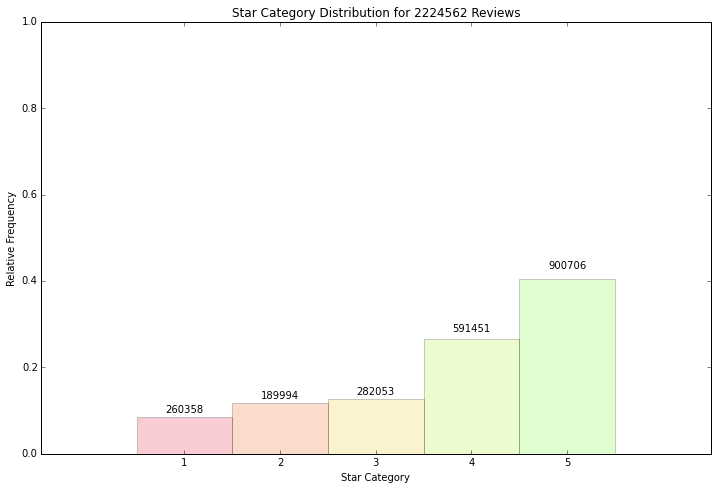

In [8]:
stars_labels = np.array([x_stars+1 for x_stars in range(N_star_categories)])
star_category_dist_fig = plt.figure(figsize=(12,8))
bar_plot_indices = np.arange(N_star_categories)
star_category_absolute_frequencies = business_user_review_and_tip_DF.review_stars.value_counts(ascending=True)
star_category_relative_frequencies = np.array(star_category_absolute_frequencies)/float(sum(star_category_absolute_frequencies))

rects = plt.bar(bar_plot_indices, star_category_relative_frequencies, width=1, color=colors, alpha=.2)
for (idx, rect) in enumerate(rects):
        plt.gca().text(rect.get_x()+rect.get_width()/2., 1.05*rect.get_height(), '%d'%int(star_category_absolute_frequencies[idx+1]),
                ha='center', va='bottom')


plt.xticks(bar_plot_indices+0.5, stars_labels, rotation='horizontal')
#x, labels, rotation='vertical'

plt.xlabel('Star Category')
plt.ylabel('Relative Frequency')
plt.ylim([0,1])
plt.title('Star Category Distribution for {0} Reviews'.format(len(business_user_review_and_tip_DF)))
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
#plt.savefig('stars_distribution.png')
plt.show()

# Rating trend on individual business

In [13]:
company = '4bEjOyTaDG24SY5TxsaUNQ'

In [14]:
meanGbt = business_user_review_and_tip_DF.groupby(['business_id', 'date']).mean()


In [15]:
businessStarOverview= meanGbt.loc[[company], 'review_stars']

In [16]:
businessStarOverview = businessStarOverview.tail(100)

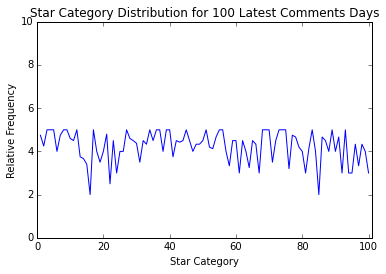

In [17]:
plt.plot(np.array([x + 1 for x in range(businessStarOverview.count())]), businessStarOverview)
plt.axis([0, businessStarOverview.count() +1 , 0, 10])


#plt.xticks(businessStarOverview.index.levels[1], stars_labels, rotation='horizontal')
#x, labels, rotation='vertical'

plt.xlabel('Star Category')
plt.ylabel('Relative Frequency')
plt.ylim([0,10])
plt.title('Star Category Distribution for {0} Latest Comments Days'.format(len(businessStarOverview)))
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

In [18]:
#businessStarOverview.index.levels[1]

#wordcould for individual business


In [19]:
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter
from nltk.corpus import stopwords

#nltk.download() # download the english stopwords corpus and the punkt package and maybe the porter stemmer if not present

In [ ]:
# good tutorial -
# www.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html
POSITIVE_WORDS = set([line.strip() for line in open('/Users/shuangwu/Desktop/test/text/positive-words.txt', 'r')])
NEGATIVE_WORDS = set([line.strip() for line in open('/Users/shuangwu/Desktop/test/text/negative-words.txt', 'r')])
NLTK_STOPWORDS = set(stopwords.words('english'))
MORE_STOPWORDS = set([line.strip() for line in open('/Users/shuangwu/Desktop/test/text/more_stopwords.txt', 'r')])

#ALL_STOPWORDS = set(stopwords.words('english'), [line.strip() for line in open('more_stopwords.txt', 'r')])

def textProcess(s):
    s = s.lower()
    s = s.translate(None, string.punctuation)
    # may consider removing arabic-hindu digits
    token_list = nltk.word_tokenize(s)
    exclude_stopwords = lambda token : token not in NLTK_STOPWORDS
    return filter(exclude_stopwords, token_list)




In [21]:
neutral = business_user_review_and_tip_DF[business_user_review_and_tip_DF['review_stars'].isin([3])]

In [22]:
bad = business_user_review_and_tip_DF[business_user_review_and_tip_DF['review_stars'].isin([1,2])]

In [23]:
good = business_user_review_and_tip_DF[business_user_review_and_tip_DF['review_stars'].isin([4,5])]

In [24]:
gtbNeutral = neutral.groupby(['business_id'])['text'].apply(lambda x: "{%s}" % ', '.join(x))  # group text by business

In [25]:
gtbBad = bad.groupby(['business_id'])['text'].apply(lambda x: "{%s}" % ', '.join(x))  # group text by business

In [26]:
gtbGood = good.groupby(['business_id'])['text'].apply(lambda x: "{%s}" % ', '.join(x))  # group text by business

In [27]:
target = (textProcess(gtbBad[company]), textProcess(gtbNeutral[company]), textProcess(gtbGood[company]))

In [28]:
#http://stackoverflow.com/questions/17841149/pandas-groupby-how-to-get-a-union-of-strings

In [29]:
#business_user_review_and_tip_DF['text']

In [30]:
#df.groupby('A')['C'].apply(lambda x: "{%s}" % ', '.join(x))

In [31]:
#tip_DF = tip_DF.groupby(['user_id','business_id', 'date'])['tip_text'].apply(lambda x: ','.join(x)).reset_index()

In [32]:
MY_YELP_OUTPUT_DIR = '/Users/shuangwu/Desktop/test'
REVIEW_STARS_BIGRAMS_DIRECTORY = os.path.join(MY_YELP_OUTPUT_DIR, 'review_stars_bigrams')
REVIEW_STARS_TRIGRAMS_DIRECTORY = os.path.join(MY_YELP_OUTPUT_DIR, 'review_stars_trigrams')

if not os.path.exists(REVIEW_STARS_BIGRAMS_DIRECTORY):
    os.makedirs(REVIEW_STARS_BIGRAMS_DIRECTORY)

if not os.path.exists(REVIEW_STARS_TRIGRAMS_DIRECTORY):
    os.makedirs(REVIEW_STARS_TRIGRAMS_DIRECTORY)

In [33]:
for categories in range(3):
       bigrams = ["%s %s" %bi for bi in nltk.bigrams(target[categories])]
       bigrams_df = DataFrame.from_dict(Counter(bigrams).most_common(len(target[categories])))
       bigrams_df = bigrams_df.head(1000)
       bigram_csv_filepath = os.path.join(REVIEW_STARS_BIGRAMS_DIRECTORY, '{0}_category.csv'.format(categories))
       bigrams_df.to_csv(bigram_csv_filepath, index=False)
    
       trigrams = ["%s %s %s" %tri for tri in nltk.trigrams(target[categories])]
       trigrams_df = DataFrame.from_dict(Counter(trigrams).most_common(len(target[categories])))
       trigram_csv_filepath = os.path.join(REVIEW_STARS_TRIGRAMS_DIRECTORY, '{0}_category.csv'.format(categories))
       trigrams_df.to_csv(trigram_csv_filepath, index=False)
       trigrams_df = trigrams_df.head(1000)
    
        



In [34]:
import rpy2.interactive as r
import rpy2.interactive.packages
rlib = r.packages.packages
r.packages.importr("utils")
#rlib.utils.install_packages("tm")
#rlib.utils.install_packages("SnowballC")
#rlib.utils.install_packages("wordcloud")
#rlib.utils.install_packages("RColorBrewer")

rpy2.robjects.packages.Package as a <module 'utils' (built-in)>

In [35]:
'''
%%R 
# Install
install.packages("tm",lib="/usr/local/lib/R/3.2/site-library")  # for text mining
install.packages("SnowballC",lib="/usr/local/lib/R/3.2/site-library") # for text stemming
install.packages("wordcloud",lib="/usr/local/lib/R/3.2/site-library") # word-cloud generator 
install.packages("RColorBrewer",lib="/usr/local/lib/R/3.2/site-library") # color palettes

'''


'\n%%R \n# Install\ninstall.packages("tm",lib="/usr/local/lib/R/3.2/site-library")  # for text mining\ninstall.packages("SnowballC",lib="/usr/local/lib/R/3.2/site-library") # for text stemming\ninstall.packages("wordcloud",lib="/usr/local/lib/R/3.2/site-library") # word-cloud generator \ninstall.packages("RColorBrewer",lib="/usr/local/lib/R/3.2/site-library") # color palettes\n\n'

In [36]:
%%R
# Load
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")
 

/Desktop/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning:

Loading required package: NLP


/Desktop/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning:

Loading required package: RColorBrewer




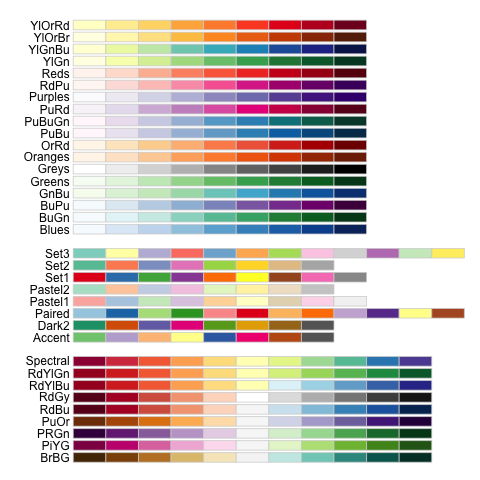

In [38]:
%%R
par(mar = c(0, 4, 0, 0))
display.brewer.all()

In [51]:

%%R -i MY_YELP_OUTPUT_DIR,REVIEW_STARS_TRIGRAMS_DIRECTORY,REVIEW_STARS_BIGRAMS_DIRECTORY


for (xstars in 0:2) {
    xstars.bigrams.path <- paste(REVIEW_STARS_BIGRAMS_DIRECTORY, '/', xstars, '_category.csv',sep='')
    xstars.trigrams.path <- paste(REVIEW_STARS_TRIGRAMS_DIRECTORY, '/', xstars, '_category.csv',sep='')
    xstars.bigrams.df <- read.csv(xstars.bigrams.path)
    xstars.trigrams.df <- read.csv(xstars.trigrams.path)
    xstars.wordcloud.df <- rbind(xstars.bigrams.df[0:1000,], xstars.trigrams.df[0:1000,])
    xstars.wordcloud.df <- xstars.wordcloud.df[with(xstars.wordcloud.df, order(-X1, X0)),]
    
    pal <- brewer.pal(9, "Set3")
    png(paste(MY_YELP_OUTPUT_DIR, '/', xstars, '_category_wordcloud.png',sep=''), width=960, height=960)
    wordcloud(xstars.wordcloud.df$X0, xstars.wordcloud.df$X1 , max.words=200, colors=pal)
    dev.off()
}


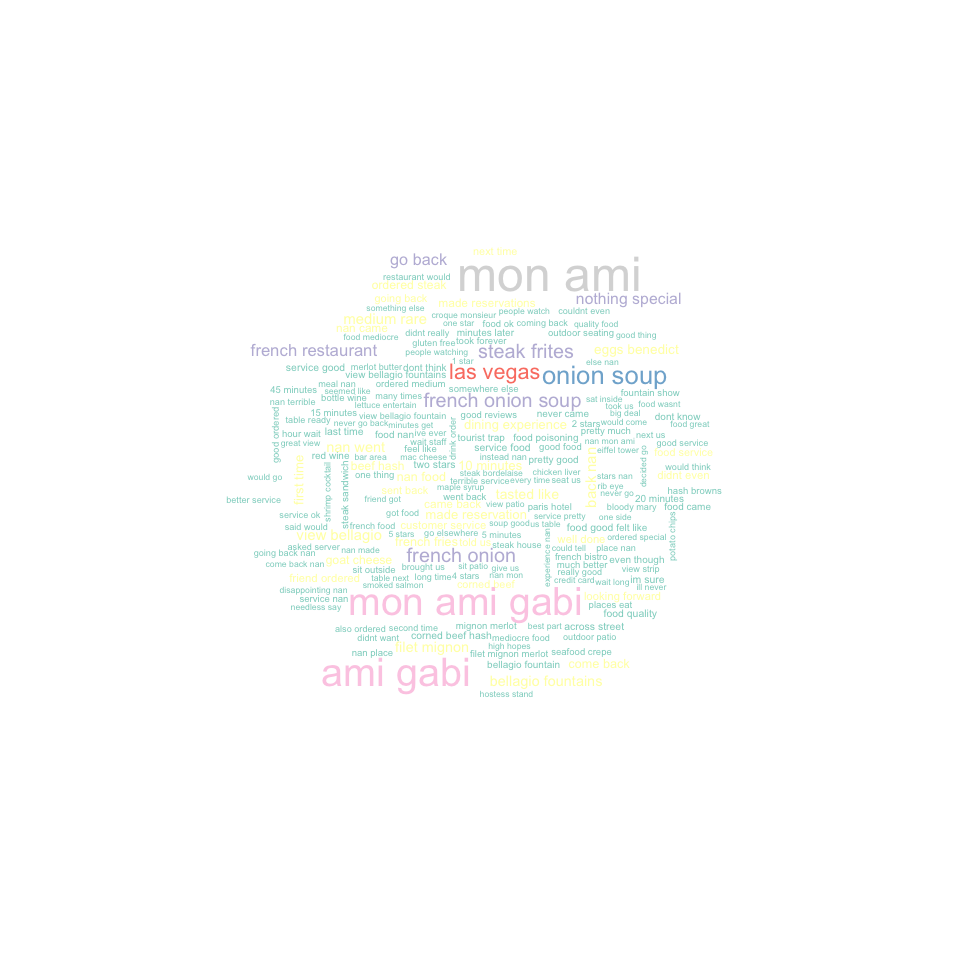

In [52]:
from IPython.core.display import Image
Image(filename=os.path.join(MY_YELP_OUTPUT_DIR, '0_category_wordcloud.png'))

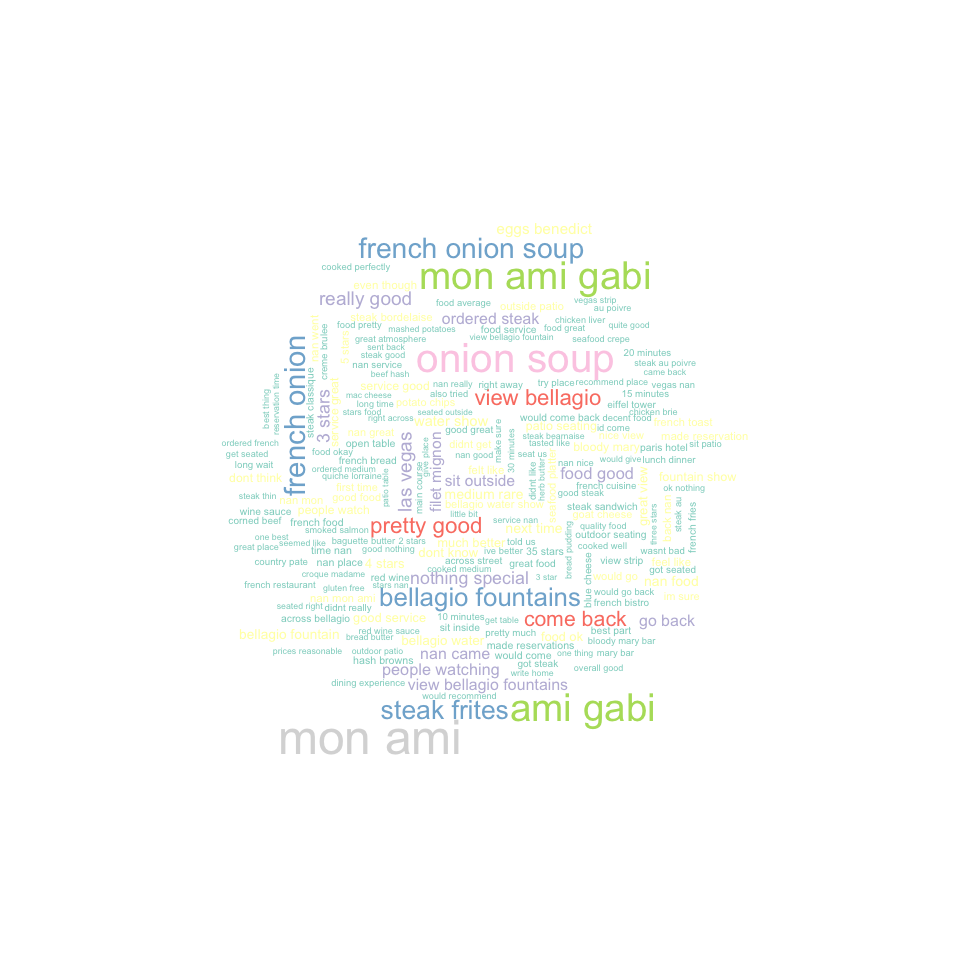

In [54]:
from IPython.core.display import Image
Image(filename=os.path.join(MY_YELP_OUTPUT_DIR, '1_category_wordcloud.png'))

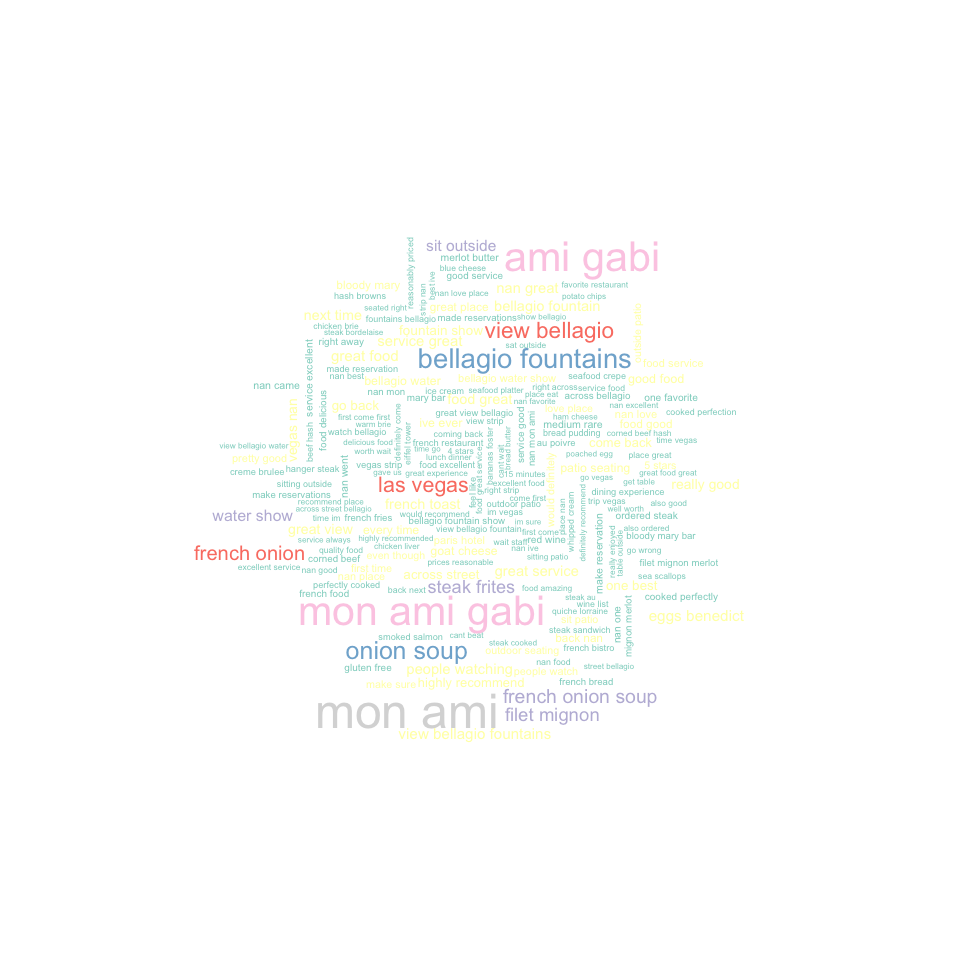

In [55]:
from IPython.core.display import Image
Image(filename=os.path.join(MY_YELP_OUTPUT_DIR, '2_category_wordcloud.png'))

# Machine Learning Mission: Predict Star Category Given a Yelp Review

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import *
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score


%matplotlib inline
pd.options.display.mpl_style = 'default'
pd.set_option('display.max_columns', 36)
print pd.__version__

0.16.2


In [4]:
import nltk
import string
from nltk import word_tokenize
from nltk.util import bigrams, trigrams
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter

#nltk.download() # download the english stopwords corpus and the punkt package and maybe the porter stemmer if not present

In [44]:
POSITIVE_WORDS = set([line.strip() for line in open('./text/positive-words.txt', 'r')])
NEGATIVE_WORDS = set([line.strip() for line in open('./text/negative-words.txt', 'r')])
NLTK_STOPWORDS = set(stopwords.words('english'))
MORE_STOPWORDS = set([line.strip() for line in open('./text/more_stopwords.txt', 'r')])

def textProcess(s):
    s = s.lower()
    s = s.translate(None, string.punctuation)
    # may consider removing arabic-hindu digits
    token_list = nltk.word_tokenize(s)
    exclude_stopwords = lambda token : token not in NLTK_STOPWORDS
    return filter(exclude_stopwords, token_list)

In [42]:
#final_DF = business_user_review_and_tip_DF

final_csv_filename = os.path.join("./rawData", 'final.csv')
business_user_review_and_tip_DF = pd.read_csv(final_csv_filename)
final_DF = business_user_review_and_tip_DF.iloc[0:2000 , :]

In [46]:
final_DF['text'] = final_DF['text'].apply(textProcess)

/Desktop/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [48]:
TEST_SIZE = 0.40
train_review, test_review, train_stars, test_stars, train_average_stars, test_average_stars = train_test_split(final_DF['text'],
                                                    final_DF['review_stars'], final_DF['new_average_stars'],
                                                    test_size=TEST_SIZE,
                                                    random_state=42)

In [49]:
new_vectorizer = CountVectorizer(ngram_range=(1, 3),token_pattern=r'\b\w+\b')


In [50]:
new_vectorizer_matrix_train = new_vectorizer.fit_transform(train_review)
new_vectorizer_matrix_test = new_vectorizer.transform(test_review)
new_vectorizer_matrix_train, new_vectorizer_matrix_test

AttributeError: 'list' object has no attribute 'lower'

In [51]:
multinomial_nb_classifier = MultinomialNB()
multinomial_nb_classifier.fit(new_vectorizer_matrix_train, train_stars)
multinomial_nb_prediction = multinomial_nb_classifier.predict(new_vectorizer_matrix_test)

NameError: name 'new_vectorizer_matrix_train' is not defined

In [80]:
def make_confusion_matrix_relative(confusion_matrix):
    star_category_classes = [1, 2, 3, 4, 5]
    N = map(lambda clazz : sum(test_stars == clazz), star_category_classes)
    relative_confusion_matrix = np.empty((len(star_category_classes), len(star_category_classes)))
    
    for j in range(0, len(star_category_classes)):
        if N[j] > 0:
            relative_frequency = confusion_matrix[j, :] / float(N[j])
            relative_confusion_matrix[j, :] = relative_frequency
            
    return relative_confusion_matrix

# http://www.wenda.io/questions/4330313/heatmap-with-text-in-each-cell-with-matplotlibs-pyplot.html
# http://stackoverflow.com/questions/20520246/create-heatmap-using-pandas-timeseries
# http://sebastianraschka.com/Articles/heatmaps_in_r.html
# http://code.activestate.com/recipes/578175-hierarchical-clustering-heatmap-python/
def plot_confusion_matrix(confusion_matrix=[[]], title='CM', savefilename=''):
    rcm = make_confusion_matrix_relative(confusion_matrix)
    #plt.imshow(rcm, vmin=0, vmax=1, interpolation='nearest')
    c = plt.pcolor(rcm, edgecolors='k', linewidths=4, cmap='jet', vmin=0.0, vmax=1.0)
    plt.title(title)
    plt.colorbar()
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.xticks(0.5 + np.arange(5), np.arange(1,6))
    plt.yticks(0.5 + np.arange(5), np.arange(1,6))

    def show_values(pc, fmt="%.2f", **kw):
        from itertools import izip
        pc.update_scalarmappable()
        ax = pc.get_axes()
        for p, color, value in izip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if sum(color[:2] > 0.3) >= 2:
                color = (0.0, 0.0, 0.0)
            else:
                color = (1.0, 1.0, 1.0)
            ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)
    
    show_values(c)

    if savefilename:
        plt.savefig(savefilename, bbox_inches='tight')
    
    return plt.show()

[[ 0.02380952  0.          0.          0.61904762  0.35714286]
 [ 0.          0.          0.          0.671875    0.328125  ]
 [ 0.          0.          0.02970297  0.62376238  0.34653465]
 [ 0.          0.          0.02183406  0.41048035  0.56768559]
 [ 0.          0.          0.01098901  0.09340659  0.8956044 ]]


/Desktop/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



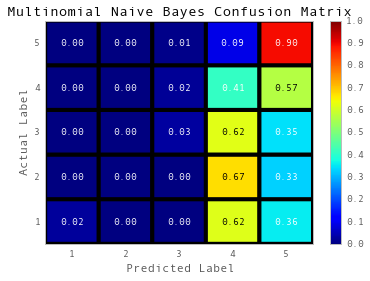

In [81]:
multinomial_confusion_matrix = confusion_matrix(test_stars, multinomial_nb_prediction)
print make_confusion_matrix_relative(multinomial_confusion_matrix)
plot_confusion_matrix(multinomial_confusion_matrix, 'Multinomial Naive Bayes Confusion Matrix', savefilename='MultinomialCM.png')

In [85]:
def print_classifier_performance_metrics(name, predictions):
    target_names = ['1 star', '2 star', '3 star', '4 star', '5 star']
    
    print "MODEL: %s" % name
    print

    print 'Precision: ' + str(metrics.precision_score(test_stars, predictions))
    print 'Recall: ' + str(metrics.recall_score(test_stars, predictions))
    print 'F1: ' + str(metrics.f1_score(test_stars, predictions))
    print 'Accuracy: ' + str(metrics.accuracy_score(test_stars, predictions))

    print
    print 'Classification Report:'
    print classification_report(test_stars, predictions, target_names=target_names)
    
    print
    print 'Precision variance: %f' % np.var(precision_score(test_stars, predictions, average=None), ddof=len(target_names)-1)
    
    print
    print 'Recall variance: %f' % np.var(recall_score(test_stars, predictions, average=None), ddof=len(target_names)-1)

In [86]:
print_classifier_performance_metrics('Multinomial Naive Bayes', multinomial_nb_prediction)

MODEL: Multinomial Naive Bayes

Precision: 0.469013985185
Recall: 0.53
F1: 0.452148264651
Accuracy: 0.53

Classification Report:
             precision    recall  f1-score   support

     1 star       1.00      0.02      0.05        42
     2 star       0.00      0.00      0.00        64
     3 star       0.25      0.03      0.05       101
     4 star       0.36      0.41      0.38       229
     5 star       0.62      0.90      0.73       364

avg / total       0.47      0.53      0.45       800


Precision variance: 0.581171

Recall variance: 0.602350


/Desktop/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1082: DeprecationWarning:

The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".

/Desktop/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

/Desktop/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1172: DeprecationWarning:

The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit valu

In [87]:
N = 10
vocab = np.array([t for t, i in sorted(bag_of_words_vectorizer.vocabulary_.iteritems(), key=itemgetter(1))])

for i, label in enumerate(sorted(set(train_y))):
 top_n_features_indices = np.argsort(multinomial_nb_classifier.coef_[i])[-N:]
 print "\nThe top %d most informative features for star category %d: \n%s" % (N, label, ", ".join(vocab[top_n_features_indices]))

NameError: name 'bag_of_words_vectorizer' is not defined

# ReFeature Engineering to Improve Classifier Accuracy


In [110]:
final_DF = business_user_review_and_tip_DF

#final_csv_filename = os.path.join("./rawData", 'final.csv')
#business_user_review_and_tip_DF = pd.read_csv(final_csv_filename)
#final_DF = business_user_review_and_tip_DF.iloc[0:2000 , :]

In [112]:
#final_DF

In [8]:
import json
from collections import OrderedDict
 



def count_number_of_positive_words(document):
    return len(filter(lambda tok : tok in POSITIVE_WORDS, document))

def count_number_of_negative_words(document):
    return len(filter(lambda tok : tok in NEGATIVE_WORDS, document))




In [18]:
final_DF['text'] = final_DF.text.apply(textProcess)

TypeError: translate() takes exactly one argument (2 given)

In [52]:
final_DF['text']

0       [friendly, people, friendly, bartenders, good,...
1       [awesome, greeted, came, staff, owner, daddy, ...
2       [nu, towne, place, roomies, absolutely, enjoy,...
3       [place, deal, great, drinks, atmosphere, retro...
4       [history, people, license, plates, first, expe...
5       [perfect, location, nu, towne, saloon, way, he...
6       [review, would, 1973, everyone, friendly, welc...
7       [lots, cock, sucking, ass, eating, cum, swappi...
8       [one, best, bars, town, years, daddy, ron, rea...
9       [place, plays, sunshine, day, brady, bunch, ok...
10      [moved, town, told, go, nutowne, sunday, want,...
11      [wow, never, oldest, gay, bar, phoenix, cool, ...
12      [love, nutowne, dirt, lot, endless, array, ama...
13      [first, apartment, phx, van, buren, 52nd, stre...
14      [refreshing, alternative, charlies, tired, cha...
15      [truely, one, americas, greatest, gay, bars, y...
16      [phoenix, place, love, go, friendly, bartender...
17      [dont,

In [53]:
final_DF['positive_words_count'] = final_DF.text.apply(count_number_of_positive_words)
final_DF['negative_words_count'] = final_DF.text.apply(count_number_of_negative_words)
#final_DF['neutral_words_count'] = final_DF.review_length - (df_with_refeature_engineered.positive_words_count + df_with_refeature_engineered.negative_words_count)
final_DF['all_sentiment_words_count'] = final_DF['positive_words_count'] + final_DF['negative_words_count']

/Desktop/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Desktop/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Desktop/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/p

In [54]:
final_DF['all_sentiment_words_count'].head(5)

0    6
1    3
2    9
3    3
4    6
Name: all_sentiment_words_count, dtype: int64

In [55]:
final_DF['positive_words_count'].head(5)

0    5
1    3
2    8
3    2
4    4
Name: positive_words_count, dtype: int64

In [56]:
final_DF['negative_words_count'].head(5)

0    1
1    0
2    1
3    1
4    2
Name: negative_words_count, dtype: int64

In [57]:
final_DF['positive'] = (final_DF['positive_words_count'] * 1.0)/ (final_DF['all_sentiment_words_count'] * 1.0)

/Desktop/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [58]:
final_DF['positive'] = final_DF['positive'] = final_DF['positive'].fillna(2)

/Desktop/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [71]:
final_DF = final_DF.drop(final_DF[final_DF.positive ==2].index)

In [70]:
#final_DF.sort('positive')

In [154]:
TEST_SIZE = 0.40
train_review, test_review, train_stars, test_stars = train_test_split(final_DF[['new_average_stars','positive']],
                                                    final_DF['review_stars'],
                                                    test_size=TEST_SIZE,
                                                    random_state=42)

In [155]:



from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(train_review, train_stars)





LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [156]:
forest100 = RandomForestClassifier(n_estimators = 100, random_state=42)



In [157]:
forest100.fit(train_review, train_stars)
forest100_pred = forest100.predict(test_review)


In [158]:

def make_confusion_matrix_relative(confusion_matrix):
    star_category_classes = [1, 2, 3, 4, 5]
    N = map(lambda clazz : sum(test_stars == clazz), star_category_classes)
    relative_confusion_matrix = np.empty((len(star_category_classes), len(star_category_classes)))
    
    for j in range(0, len(star_category_classes)):
        if N[j] > 0:
            relative_frequency = confusion_matrix[j, :] / float(N[j])
            relative_confusion_matrix[j, :] = relative_frequency
            
    return relative_confusion_matrix

# http://www.wenda.io/questions/4330313/heatmap-with-text-in-each-cell-with-matplotlibs-pyplot.html
# http://stackoverflow.com/questions/20520246/create-heatmap-using-pandas-timeseries
# http://sebastianraschka.com/Articles/heatmaps_in_r.html
# http://code.activestate.com/recipes/578175-hierarchical-clustering-heatmap-python/
def plot_confusion_matrix(confusion_matrix=[[]], title='CM', savefilename=''):
    rcm = make_confusion_matrix_relative(confusion_matrix)
    #plt.imshow(rcm, vmin=0, vmax=1, interpolation='nearest')
    c = plt.pcolor(rcm, edgecolors='k', linewidths=4, cmap='jet', vmin=0.0, vmax=1.0)
    plt.title(title)
    plt.colorbar()
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.xticks(0.5 + np.arange(5), np.arange(1,6))
    plt.yticks(0.5 + np.arange(5), np.arange(1,6))

    def show_values(pc, fmt="%.2f", **kw):
        from itertools import izip
        pc.update_scalarmappable()
        ax = pc.get_axes()
        for p, color, value in izip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if sum(color[:2] > 0.3) >= 2:
                color = (0.0, 0.0, 0.0)
            else:
                color = (1.0, 1.0, 1.0)
            ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)
    
    show_values(c)

    if savefilename:
        plt.savefig(savefilename, bbox_inches='tight')
    
    return plt.show()


[[ 0.71111111  0.06666667  0.06666667  0.15555556  0.        ]
 [ 0.1147541   0.18032787  0.19672131  0.26229508  0.24590164]
 [ 0.07692308  0.07692308  0.16346154  0.375       0.30769231]
 [ 0.01793722  0.03587444  0.10313901  0.48878924  0.35426009]
 [ 0.00282486  0.02259887  0.07062147  0.26553672  0.63841808]]


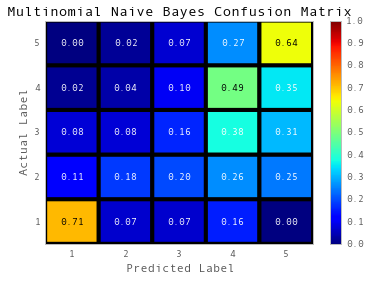

In [159]:
multinomial_confusion_matrix = confusion_matrix(test_stars, forest100_pred)
print make_confusion_matrix_relative(multinomial_confusion_matrix)
plot_confusion_matrix(multinomial_confusion_matrix, 'Multinomial Naive Bayes Confusion Matrix', savefilename='MultinomialCM.png')

In [160]:
def print_classifier_performance_metrics(name, predictions):
    target_names = ['1 star', '2 star', '3 star', '4 star', '5 star']
    
    print "MODEL: %s" % name
    print

    print 'Precision: ' + str(metrics.precision_score(test_stars, predictions))
    print 'Recall: ' + str(metrics.recall_score(test_stars, predictions))
    print 'F1: ' + str(metrics.f1_score(test_stars, predictions))
    print 'Accuracy: ' + str(metrics.accuracy_score(test_stars, predictions))

    print
    print 'Classification Report:'
    print classification_report(test_stars, predictions, target_names=target_names)
    
    print
    print 'Precision variance: %f' % np.var(precision_score(test_stars, predictions, average=None), ddof=len(target_names)-1)
    
    print
    print 'Recall variance: %f' % np.var(recall_score(test_stars, predictions, average=None), ddof=len(target_names)-1)

In [161]:
print_classifier_performance_metrics('Random Forest (100 Learners)', forest100_pred)


MODEL: Random Forest (100 Learners)

Precision: 0.491053140585
Recall: 0.501905972046
F1: 0.493929793643
Accuracy: 0.501905972046

Classification Report:
             precision    recall  f1-score   support

     1 star       0.62      0.71      0.66        45
     2 star       0.29      0.18      0.22        61
     3 star       0.21      0.16      0.18       104
     4 star       0.41      0.49      0.45       223
     5 star       0.64      0.64      0.64       354

avg / total       0.49      0.50      0.49       787


Precision variance: 0.146648

Recall variance: 0.259090


/Desktop/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1082: DeprecationWarning:

The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".

/Desktop/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1172: DeprecationWarning:

The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".

/Desktop/anaconda/lib/python2.7/si